<font size="5">**Timing the premodel**</font>
<br /><br />
<font size="3">This code is intended to time the <font color = "green">average premodel overhead</font> per single image.</font>

In [1]:
import numpy as np
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
from matplotlib import pyplot
from numpy import where
from sklearn.metrics import accuracy_score
import image_generator
import feature_extractor
import time

In [2]:
image_generator.main()


imgGen = image_generator.ImageGenerator('images/val/images', 'images/val/val.txt', 'images/val/synset_words.txt')


df = pd.read_csv('all_new_features_hier_norm_top_1.csv')
df.drop(['filename'], 1, inplace = True)

X = np.array(df.drop(['Mobilenet_v1', 'Inception_v4', 'Resnet_v1_152'], 1))

Y = np.array(df[['Mobilenet_v1', 'Inception_v4', 'Resnet_v1_152']])




img_nums = []
for i in range(1, 50001):                 # the range of images can be selected here
    img_nums.append(i)

img_features = []
img_paths = []
filenames = []
for i in range(len(img_nums)):
    img_path, _ = imgGen.get_image_data(img_nums[i])
    img_paths.append(img_path)                                             # we obtain the image paths and filenames
for i in range(len(img_nums)):
    img_name = imgGen.get_image_filename(img_nums[i])
    filenames.append(img_name)

images/val/images\ILSVRC2012_val_00017268.JPEG Shih-Tzu
images/val/images\ILSVRC2012_val_00012945.JPEG knee pad
images/val/images\ILSVRC2012_val_00046134.JPEG basenji
images/val/images\ILSVRC2012_val_00043594.JPEG motor scooter, scooter
images/val/images\ILSVRC2012_val_00027151.JPEG minivan
images/val/images\ILSVRC2012_val_00024623.JPEG neck brace
images/val/images\ILSVRC2012_val_00026867.JPEG scuba diver
images/val/images\ILSVRC2012_val_00025125.JPEG bonnet, poke bonnet
images/val/images\ILSVRC2012_val_00003277.JPEG running shoe
images/val/images\ILSVRC2012_val_00045182.JPEG motor scooter, scooter


<font size="3">**KNN premodel**</font>

Average time per image is 0.05174009815216064


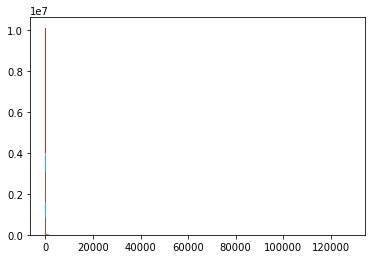

In [8]:
accuracy_list = []
model_mobile_knn = neighbors.KNeighborsClassifier()
model_inception_knn = neighbors.KNeighborsClassifier()
model_resnet_knn = neighbors.KNeighborsClassifier()
model_mobile_knn.fit(X, Y[:, 0])
model_inception_knn.fit(X, Y[:, 1])
model_resnet_knn.fit(X, Y[:, 2])


# Timing how long it takes to extract the features and predict
# the right model for a number of images and then taking the average

start_time = time.time()
for i in range(len(img_paths)):
    filename = img_paths[i]
    img_features.append(feature_extractor.extract_features(filename))

img_features = np.array(img_features)
predicted_models = []
for i in range(len(img_features)):
    img_feature = img_features[i].reshape(1, -1)
    mobile = model_mobile_knn.predict(img_feature)
    if mobile == 1:
        predicted_models.append('mobilenet_v1')
    elif mobile == 0:
        inception = model_inception_knn.predict(img_feature)
        if inception == 1:
            predicted_models.append('inception_v4')
        elif inception == 0:
            resnet = model_resnet_knn.predict(img_feature)
            if resnet == 1:
                predicted_models.append('resnet_v1_152')
            elif resnet == 0:
                predicted_models.append('failed')

end_time = time.time() - start_time
print("Average time per image is {}".format(end_time/len(img_features)))

<font size="3">**Logistic Regression premodel**</font>

C:\Users\User\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

Average time per image is 0.053167885146141056


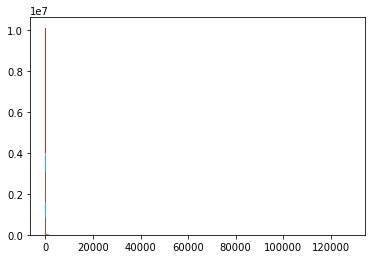

In [3]:
accuracy_list = []
model_mobile_log_reg = LogisticRegression()
model_inception_log_reg = LogisticRegression()
model_resnet_log_reg = LogisticRegression()
model_mobile_log_reg.fit(X, Y[:, 0])
model_inception_log_reg.fit(X, Y[:, 1])
model_resnet_log_reg.fit(X, Y[:, 2])


# Timing how long it takes to extract the features and predict
# the right model for a number of images and then taking the average

start_time = time.time()
for i in range(len(img_paths)):
    filename = img_paths[i]
    img_features.append(feature_extractor.extract_features(filename))

img_features = np.array(img_features)
predicted_models = []
for i in range(len(img_features)):
    img_feature = img_features[i].reshape(1, -1)
    mobile = model_mobile_log_reg.predict(img_feature)
    if mobile == 1:
        predicted_models.append('mobilenet_v1')
    elif mobile == 0:
        inception = model_inception_log_reg.predict(img_feature)
        if inception == 1:
            predicted_models.append('inception_v4')
        elif inception == 0:
            resnet = model_resnet_log_reg.predict(img_feature)
            if resnet == 1:
                predicted_models.append('resnet_v1_152')
            elif resnet == 0:
                predicted_models.append('failed')

end_time = time.time() - start_time
print("Average time per image is {}".format(end_time/len(img_features)))